In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StandardScaler
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("KMeansPySpark").getOrCreate()
data = spark.read.csv("Date_Fruit_Datasets.csv", header=True, inferSchema=True)

23/10/19 07:42:21 WARN Utils: Your hostname, Sivas-MacBook-Air.local resolves to a loopback address: 127.0.0.1, but we couldn't find any external IP address!
23/10/19 07:42:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/19 07:42:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
feature_cols = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

In [4]:
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

In [5]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(data)
data = scalerModel.transform(data)
data.select('scaledFeatures').show(5)

23/10/19 07:42:25 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+
|      scaledFeatures|
+--------------------+
|[3.93642772815405...|
|[3.15292416978063...|
|[4.91250866036073...|
|[3.87954872847445...|
|[3.24081621092488...|
+--------------------+
only showing top 5 rows



In [6]:
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures', \
                                metricName='silhouette', 
                                distanceMeasure='squaredEuclidean')

In [8]:
silhouette_score=[]

In [9]:
for i in range(3,7):
    kmeans=KMeans(featuresCol='scaledFeatures', k=i)
    model=kmeans.fit(data)
    predictions=model.transform(data)
    score=evaluator.evaluate(predictions)
    silhouette_score.append(score)
    print('Silhouette score and  k =',i,'is',score)

Silhouette score and  k = 3 is 0.4969500449503901
Silhouette score and  k = 4 is 0.5201789638940146
Silhouette score and  k = 5 is 0.5147823219878247
Silhouette score and  k = 6 is 0.41273436856372697


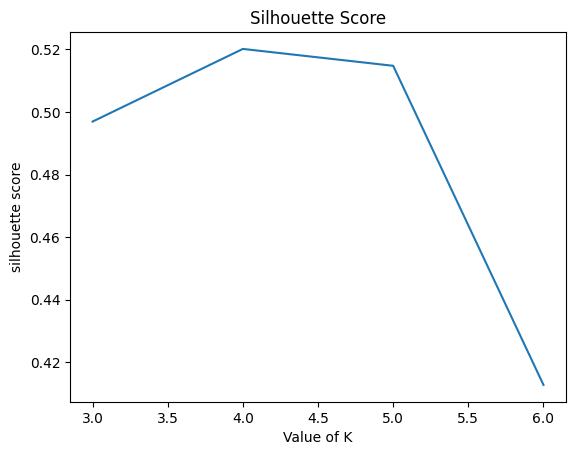

In [10]:
plt.plot(range(3,7),silhouette_score)
plt.xlabel('Value of K')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()